In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

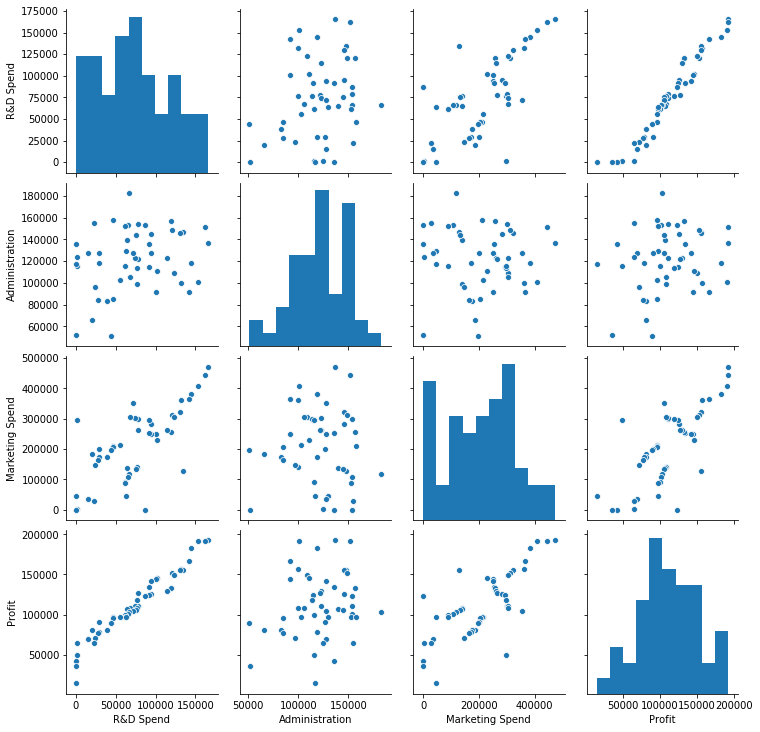

In [8]:
sns.pairplot(df)

In [25]:
X = df.iloc[:,:4]

In [30]:
y = df.iloc[:,4]

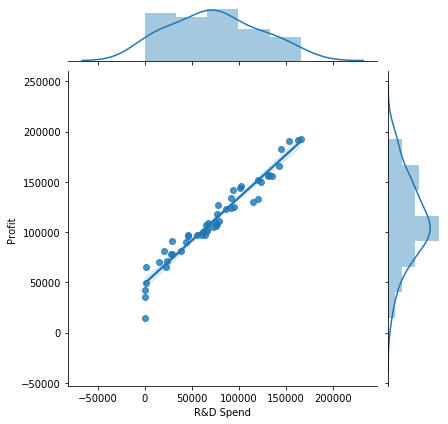

In [34]:
sns.jointplot(x="R&D Spend", y="Profit", data=df, kind="reg")

In [37]:
states= pd.get_dummies(X['State'], drop_first=True)

In [38]:
X=X.drop('State',axis=1)

In [39]:
X=pd.concat([X, states], axis=1)

In [40]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lm.coef_

array([ 7.19814259e-01, -1.79470419e-02,  3.74987995e-02, -3.58982365e+03,
       -2.68346328e+03])

In [51]:
predictions = lm.predict(X_test)

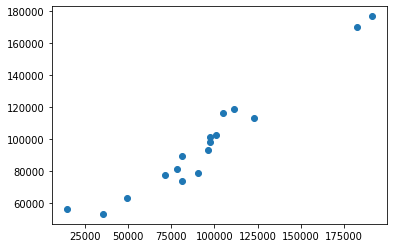

In [52]:
plt.scatter(y_test, predictions)

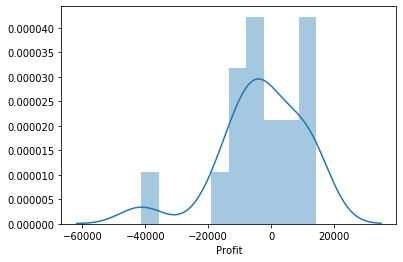

In [54]:
sns.distplot(y_test-predictions,bins=10)

In [56]:
from sklearn import metrics
print('Mean Absolute Error - ',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error - ',metrics.mean_squared_error(y_test, predictions))
print('Roow Mean Squared Error - ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error -  10209.471030657427
Mean Squared Error -  186814801.63063368
Roow Mean Squared Error -  13668.021130750189
